In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('heart_disease_dataset.csv')
print("Dataset Info:")
df.info()

print("\nFirst 5 Rows:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          10

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

df.dropna(inplace=True)  


Missing values:
 Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


In [ ]:
# Encode binary categorical features
binary_cols = ['Gender', 'Smoking', 'Diabetes', 'Obesity', 'Family History', 'Exercise Induced Angina']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df = pd.get_dummies(df, columns=['Alcohol Intake', 'Chest Pain Type'], drop_first=True)


In [6]:
# Remove outliers using IQR for numerical features
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

num_cols = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Stress Level', 'Blood Sugar']
df = remove_outliers(df, num_cols)


In [ ]:

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


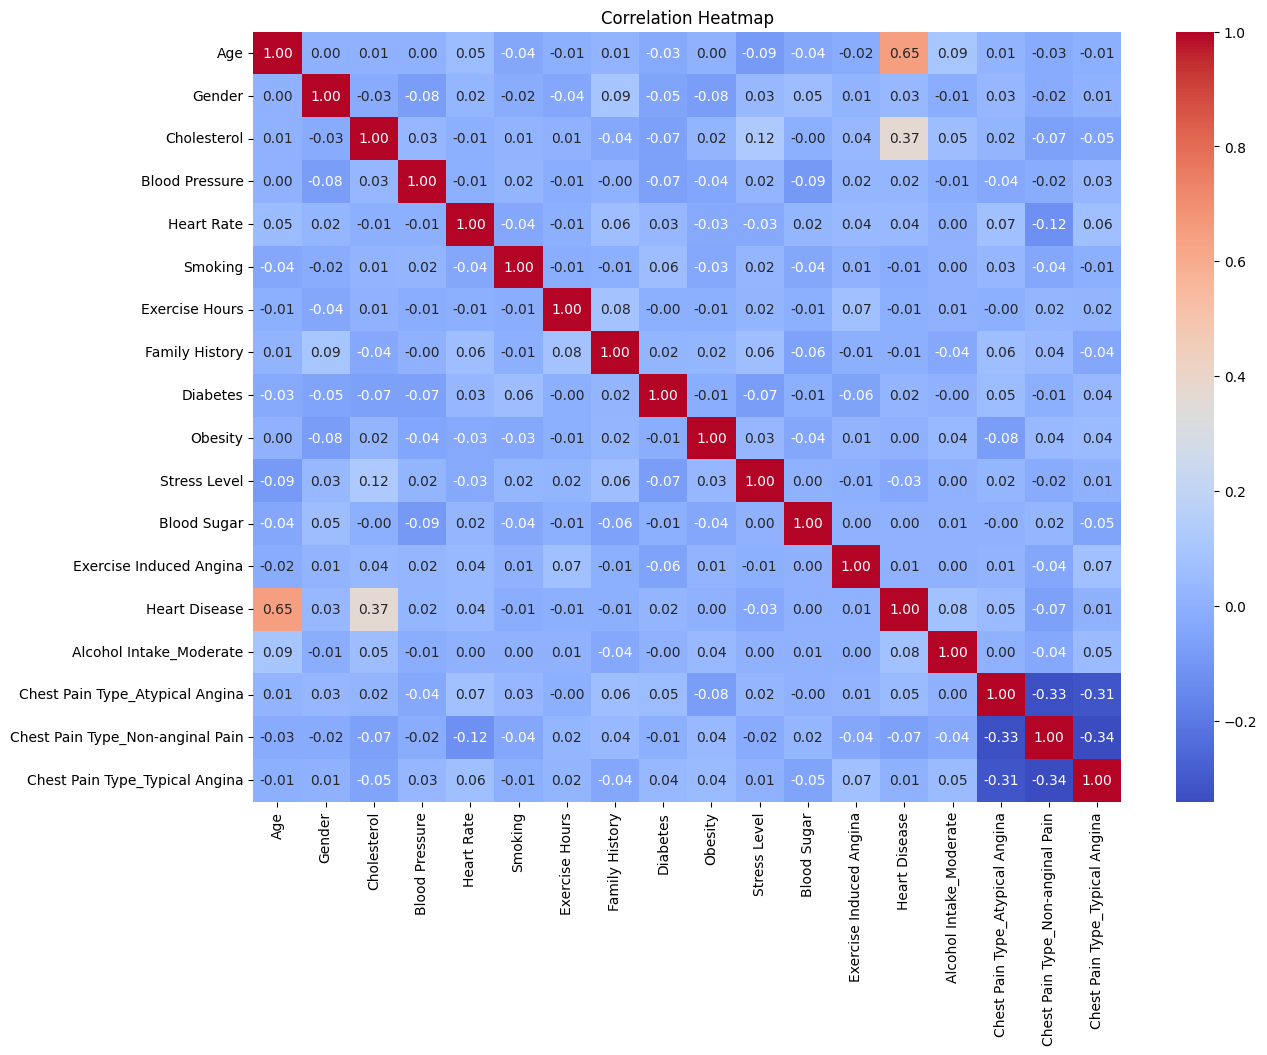

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


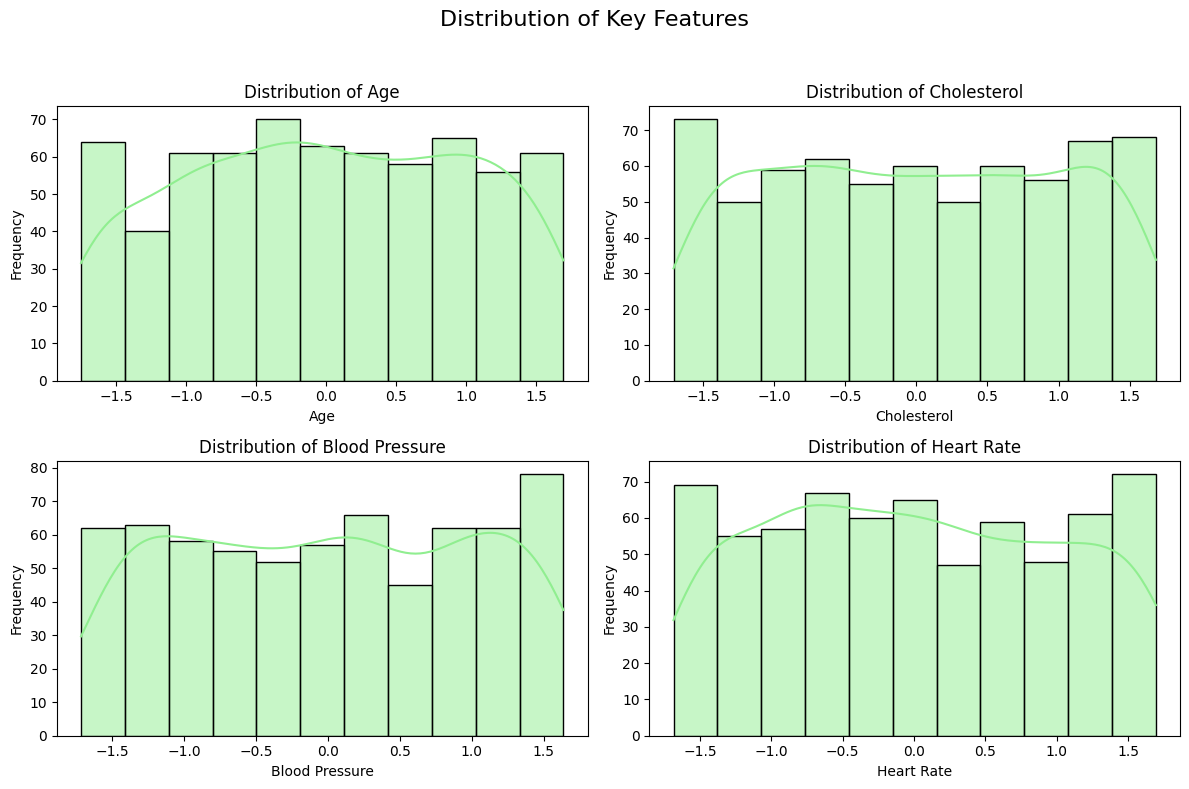

In [ ]:
features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Key Features", fontsize=16)

axes = axes.flatten()

# Plot each feature
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


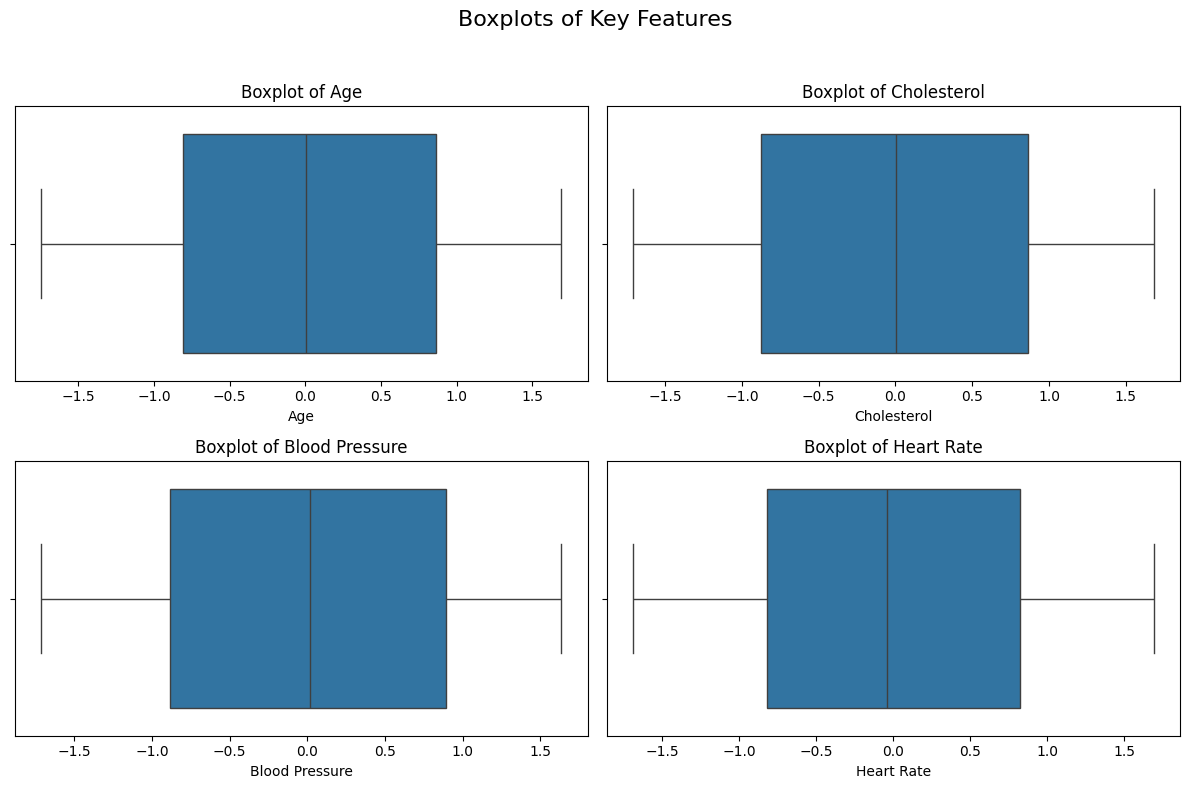

In [10]:
# Define your features
features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']

# Set up subplot grid
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
fig.suptitle("Boxplots of Key Features", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



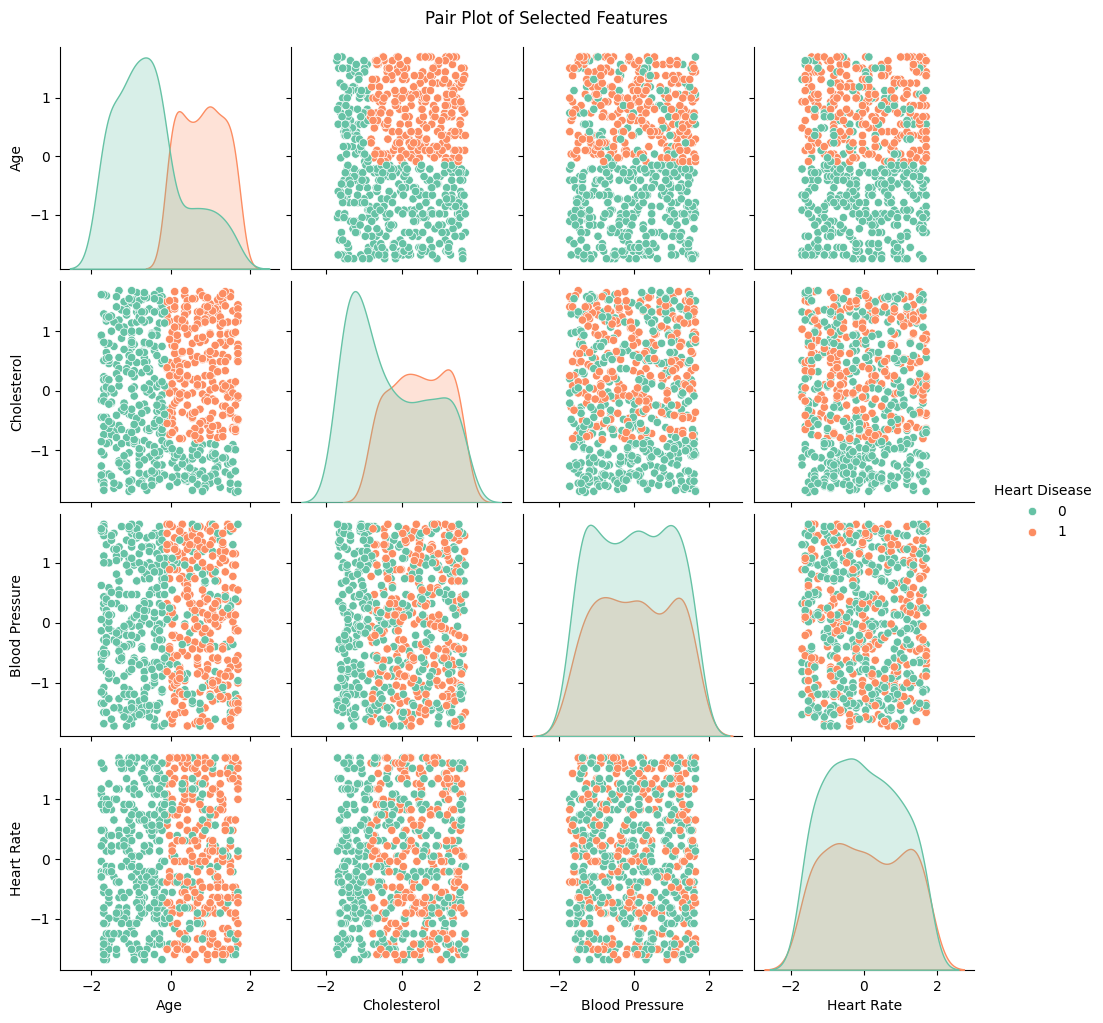

In [11]:
selected = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Heart Disease']
sns.pairplot(df[selected], hue='Heart Disease', palette='Set2')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

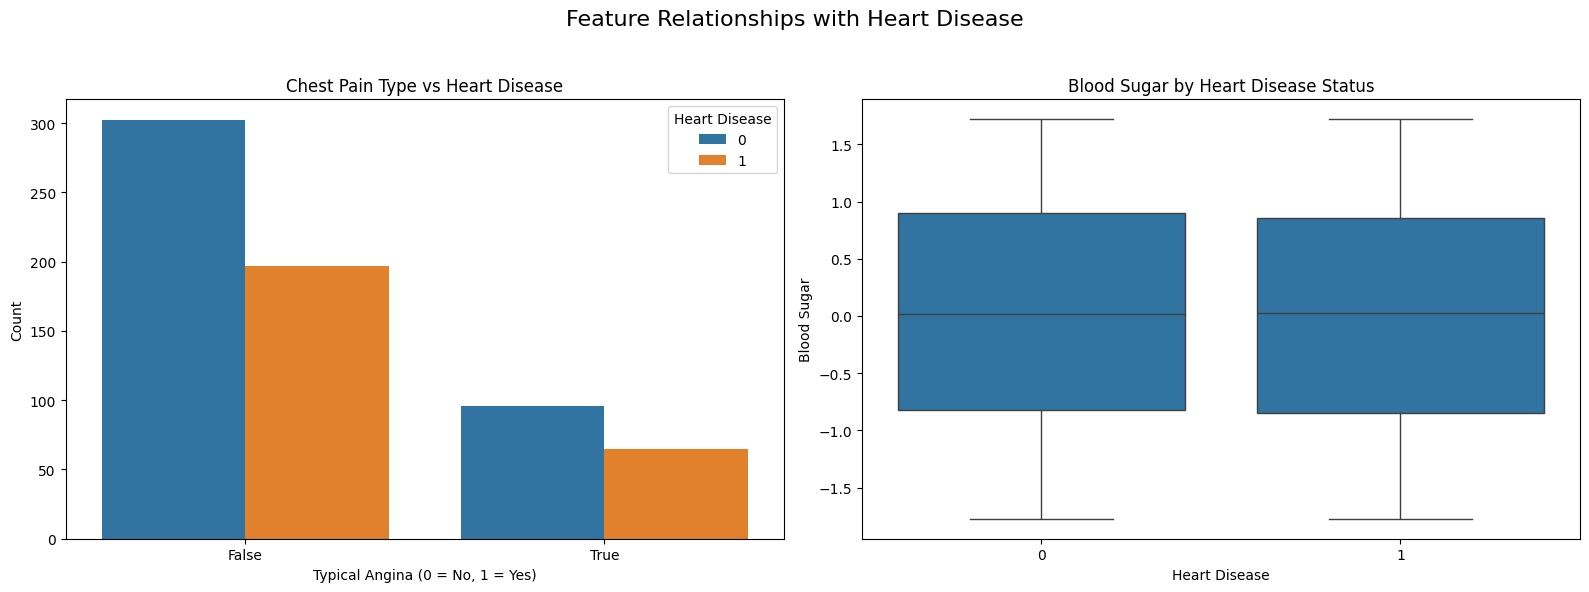

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Feature Relationships with Heart Disease", fontsize=16)

# Countplot: Chest Pain Type vs Heart Disease
sns.countplot(x='Chest Pain Type_Typical Angina', hue='Heart Disease', data=df, ax=axes[0])
axes[0].set_title("Chest Pain Type vs Heart Disease")
axes[0].set_xlabel("Typical Angina (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")

# Boxplot: Blood Sugar by Heart Disease
sns.boxplot(x='Heart Disease', y='Blood Sugar', data=df, ax=axes[1])
axes[1].set_title("Blood Sugar by Heart Disease Status")
axes[1].set_xlabel("Heart Disease")
axes[1].set_ylabel("Blood Sugar")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
# Separate features and target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "SVM": svm
}

results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8561, Precision: 0.8571, Recall: 0.8136, F1 Score: 0.8348
Confusion Matrix:
[[65  8]
 [11 48]]

Training Random Forest...
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Confusion Matrix:
[[73  0]
 [ 0 59]]

Training SVM...
SVM - Accuracy: 0.8561, Precision: 0.9167, Recall: 0.7458, F1 Score: 0.8224
Confusion Matrix:
[[69  4]
 [15 44]]



**Model Performance Summary:**

Below is a summary of the evaluation metrics for each model.

In [15]:
results_df = pd.DataFrame(results).T
display(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']])

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.856061,0.857143,0.813559,0.834783
Random Forest,1.0,1.0,1.0,1.0
SVM,0.856061,0.916667,0.745763,0.82243


**Reasoning**:
Analyze the results_df DataFrame to identify the model with the highest F1 score.



In [16]:
best_model_name = results_df['F1 Score'].idxmax()
print(f"The best performing model based on F1 Score is: {best_model_name}")

The best performing model based on F1 Score is: Random Forest


In [17]:
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Reasoning**:
Import the joblib library to save the trained model.



In [18]:
import joblib

In [19]:
joblib.dump(best_model, 'best_heart_disease_model.joblib')

['best_heart_disease_model.joblib']